In [16]:
import numpy as np
import pandas as pd
import json
import os
import math
import datetime as dt
import matplotlib.pyplot as plt
from numpy import newaxis
from keras.optimizers import Adam
from keras.layers import Dense, Activation, Dropout, LSTM, CuDNNLSTM, BatchNormalization
from keras.models import Sequential, load_model
from sklearn.metrics import mean_squared_error

import utils
import model_funcs

%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
save_dir = 'models/lstm1'
df = pd.read_csv('data_25.csv', index_col='Date')
data = df.values

In [7]:
num_input = 30
num_out = 7
train_X, train_y, dev_X, dev_y, test_X, test_y, y = utils.prepare_data(data, num_input, num_preds=num_out)

print("train_X shape", train_X.shape)
print("train_y shape", train_y.shape)
print("dev_X shape", dev_X.shape)
print("dev_y shape", dev_y.shape)
print("test_X shape", test_X.shape)
print("test_y shape", test_y.shape)

train_X shape (638, 30, 25)
train_y shape (638, 7)
dev_X shape (80, 30, 25)
dev_y shape (80, 7)
test_X shape (80, 30, 25)
test_y shape (80, 7)


In [26]:
if not os.path.exists(save_dir): os.makedirs(save_dir)

input_shape = train_X.shape[1:]
lr = 0.001
decay = 1e-6
dropout_rate = 0.3
epochs = 200
batch_size = 32

model = Sequential()
model.add(
    LSTM(
        128,
        input_shape=input_shape,
        return_sequences=True,
    )
)
model.add(Dropout(dropout_rate))
model.add(BatchNormalization())

model.add(LSTM(128, return_sequences=True))
model.add(Dropout(dropout_rate))
model.add(BatchNormalization())

model.add(LSTM(128))
model.add(Dropout(dropout_rate))
model.add(BatchNormalization())

model.add(Dense(32, activation="relu"))
model.add(Dropout(dropout_rate))

model.add(Dense(num_out, activation="softmax"))


opt = Adam(lr=lr, decay=decay)
model.compile(loss="mse", optimizer=opt)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 30, 128)           78848     
_________________________________________________________________
dropout_13 (Dropout)         (None, 30, 128)           0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 30, 128)           512       
_________________________________________________________________
lstm_11 (LSTM)               (None, 30, 128)           131584    
_________________________________________________________________
dropout_14 (Dropout)         (None, 30, 128)           0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 30, 128)           512       
_________________________________________________________________
lstm_12 (LSTM)               (None, 128)               131584    
__________

In [27]:
history = model_funcs.train(
    model,
    train_X,
    train_y,
    (dev_X, dev_y),
    epochs = epochs,
    batch_size = batch_size,
    save_dir = save_dir
)

[Model] Training Started
[Model] 200 epochs, 32 batch size
Train on 638 samples, validate on 80 samples
Epoch 1/200
638/638 [==============================] - 5s 8ms/step - loss: 1.1602 - val_loss: 0.3324
Epoch 2/200
638/638 [==============================] - 2s 3ms/step - loss: 1.1513 - val_loss: 0.3290
Epoch 3/200
638/638 [==============================] - 2s 3ms/step - loss: 1.1485 - val_loss: 0.3293
Epoch 4/200
638/638 [==============================] - 2s 3ms/step - loss: 1.1463 - val_loss: 0.3293
Epoch 5/200
638/638 [==============================] - 2s 3ms/step - loss: 1.1441 - val_loss: 0.3284
Epoch 6/200
638/638 [==============================] - 2s 3ms/step - loss: 1.1432 - val_loss: 0.3285
Epoch 7/200
638/638 [==============================] - 2s 3ms/step - loss: 1.1420 - val_loss: 0.3286
Epoch 8/200
638/638 [==============================] - 2s 3ms/step - loss: 1.1411 - val_loss: 0.3281
Epoch 9/200
638/638 [==============================] - 2s 3ms/step - loss: 1.1406 - val_

638/638 [==============================] - 2s 3ms/step - loss: 1.1321 - val_loss: 0.3326
Epoch 81/200
638/638 [==============================] - 2s 3ms/step - loss: 1.1323 - val_loss: 0.3302
Epoch 82/200
638/638 [==============================] - 2s 3ms/step - loss: 1.1320 - val_loss: 0.3298
Epoch 83/200
638/638 [==============================] - 2s 3ms/step - loss: 1.1323 - val_loss: 0.3301
Epoch 84/200
638/638 [==============================] - 2s 3ms/step - loss: 1.1321 - val_loss: 0.3306
Epoch 85/200
638/638 [==============================] - 2s 3ms/step - loss: 1.1322 - val_loss: 0.3298
Epoch 86/200
638/638 [==============================] - 2s 3ms/step - loss: 1.1317 - val_loss: 0.3279
Epoch 87/200
638/638 [==============================] - 2s 3ms/step - loss: 1.1318 - val_loss: 0.3281
Epoch 88/200
638/638 [==============================] - 2s 3ms/step - loss: 1.1317 - val_loss: 0.3279
Epoch 89/200
638/638 [==============================] - 2s 3ms/step - loss: 1.1319 - val_loss: 

Epoch 160/200
638/638 [==============================] - 2s 3ms/step - loss: 1.1305 - val_loss: 0.3297
Epoch 161/200
638/638 [==============================] - 3s 4ms/step - loss: 1.1304 - val_loss: 0.3295
Epoch 162/200
638/638 [==============================] - 3s 4ms/step - loss: 1.1305 - val_loss: 0.3300
Epoch 163/200
638/638 [==============================] - 2s 4ms/step - loss: 1.1307 - val_loss: 0.3306
Epoch 164/200
638/638 [==============================] - 2s 3ms/step - loss: 1.1304 - val_loss: 0.3292
Epoch 165/200
638/638 [==============================] - 2s 3ms/step - loss: 1.1305 - val_loss: 0.3286
Epoch 166/200
638/638 [==============================] - 3s 4ms/step - loss: 1.1306 - val_loss: 0.3295
Epoch 167/200
638/638 [==============================] - 2s 4ms/step - loss: 1.1304 - val_loss: 0.3292
Epoch 168/200
638/638 [==============================] - 3s 4ms/step - loss: 1.1303 - val_loss: 0.3284
Epoch 169/200
638/638 [==============================] - 3s 4ms/step - lo

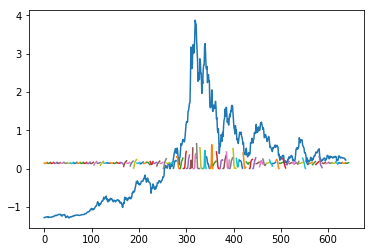

In [28]:
predicted_train = model.predict(train_X)
predicted_train = predicted_train[::num_out]
true_train = train_y[:, 0]
utils.plot_results_multiple(predicted_train.tolist(), true_train, num_out)

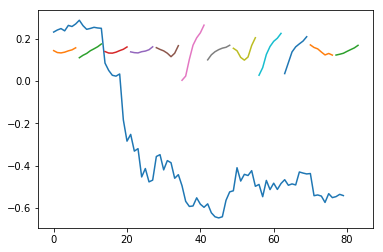

In [29]:
predicted_dev = model.predict(dev_X)
predicted_dev = predicted_dev[::num_out]
true_dev = dev_y[:, 0]
utils.plot_results_multiple(predicted_dev.tolist(), true_dev, num_out)

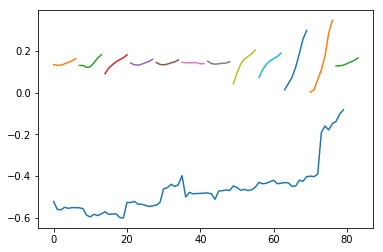

In [30]:
predicted_test = model.predict(test_X)
predicted_test = predicted_test[::num_out]
true_test = test_y[:, 0]
utils.plot_results_multiple(predicted_test.tolist(), true_test, num_out)

In [24]:
print("MSE Train:", mean_squared_error(predicted_train.reshape(-1,1)[:len(true_train)], true_train))
print("MSE Dev:", mean_squared_error(predicted_dev.reshape(-1,1)[:len(true_dev)], true_dev))
print("MSE Test:", mean_squared_error(predicted_test.reshape(-1,1)[:len(true_test)], true_test))

MSE Train: 1.148396767704158
MSE Dev: 0.30900706984663273
MSE Test: 0.38137063002886307
